<a href="https://colab.research.google.com/github/bethanystate/ISyE6202/blob/main/Casework_2_All_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Excel Data

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1mWtI5rM6q3mND741ytjbi-rXiTcNaznH'
downloaded = drive.CreateFile({'id': file_id})

In [ ]:
downloaded.GetContentFile('GivenData.xlsx')

In [ ]:
!ls -lha GivenData.xlsx

-rw-r--r-- 1 root root 26K Oct 22 05:28 GivenData.xlsx


In [ ]:
!pip install -q xlrd

import pandas as pd
from openpyxl import load_workbook

df = pd.read_excel('GivenData.xlsx')

# Task 1 - Simulator

Demand Based on Year, Period, and Day


In [ ]:
import random
from numpy.random import choice
import itertools
import numpy as np

demand_table = pd.read_excel('GivenData.xlsx', 'Demand Forecast', usecols=range(1,7), skiprows=range(6,9,1))
sim_demand = demand_table.sample(n=1, weights='Probability') #Random yearly demand based on probability

period = pd.read_excel('GivenData.xlsx', 'Transpose', usecols=range(4,6), skiprows=range(14,20,1))
sim_period = period.sample(n=1) #Random 4-week period

day_of_week = pd.read_excel('GivenData.xlsx', 'Transpose', usecols=range(8,10), skiprows=range(8,20,1))
period_demand = sim_demand.mul(other=sim_period.iloc[0]['Demand share']) #Demand within a given period

space_table = pd.read_excel('GivenData.xlsx', 'Transpose', usecols=range(1,3), skiprows=range(19,20,1))
sim_space = space_table.sample(n=1, weights='Probability') #Random locker based on weights

In [ ]:
print('The simulated yearly demand forcast is')
print(sim_demand)

print('The simulated 4-week period and Demand share is')
print(sim_period)

print('The simulated yearly demand based on given period is')
print(period_demand[['Year 1','Year 2','Year 3','Year 4', 'Year 5']])

print('The simulated daily demand for a given period and year is')
#Daily demand on a given days within a given period
daily_demand = pd.concat([period_demand.mul(other = day_of_week.iloc[0]['Day Demand Share']), 
      period_demand.mul(other = day_of_week.iloc[1]['Day Demand Share']), 
      period_demand.mul(other = day_of_week.iloc[2]['Day Demand Share']),
      period_demand.mul(other = day_of_week.iloc[3]['Day Demand Share']),
      period_demand.mul(other = day_of_week.iloc[4]['Day Demand Share']),
      period_demand.mul(other = day_of_week.iloc[5]['Day Demand Share']),
      period_demand.mul(other = day_of_week.iloc[6]['Day Demand Share'])])
print(daily_demand)
print('where Row 1 is Sunday, Row 2 Monday, etc.')


The simulated yearly demand forcast is
   Probability  Year 1  Year 2  Year 3  Year 4  Year 5
4          0.1   50000   60000   60000   60000   60000
The simulated 4-week period and Demand share is
   4-week period  Demand share
5              6          0.06
The simulated yearly demand based on given period is
   Year 1  Year 2  Year 3  Year 4  Year 5
4  3000.0  3600.0  3600.0  3600.0  3600.0
The simulated daily demand for a given period and year is
   Probability  Year 1  Year 2  Year 3  Year 4  Year 5
4      0.00030   150.0   180.0   180.0   180.0   180.0
4      0.00060   300.0   360.0   360.0   360.0   360.0
4      0.00090   450.0   540.0   540.0   540.0   540.0
4      0.00090   450.0   540.0   540.0   540.0   540.0
4      0.00108   540.0   648.0   648.0   648.0   648.0
4      0.00132   660.0   792.0   792.0   792.0   792.0
4      0.00090   450.0   540.0   540.0   540.0   540.0
where Row 1 is Sunday, Row 2 Monday, etc.


Pick Up and Drop Off Table


In [ ]:
demand_table = pd.read_excel('GivenData.xlsx', 'Pick Drop', header = 0, usecols=range(2,26), skiprows = 1, skipfooter = 1)

p = random.randint(0, 23) #pickup time
d = random.randint(0, 23) #dropoff time

if demand_table.iat[d, p] > 0:
  print('Deposit Time', d)
  print('Pickup Time', p)
  print('Probability of Dropoff and Pickup is', demand_table.iat[d, p], 'x10,000.')
else:
  print('Deposit Time', d) 
  print('Pickup Time', p)
  print('No pickup or dropoff during this time.')

print('The simulated locker space is', sim_space.iloc[0]['Space (ft3)'])


Deposit Time 10
Pickup Time 5
No pickup or dropoff during this time.
The simulated locker space is 16.0


# Task 2 - Heuristic *INSERT HERE*

# Task 3 - Extend Simulator

##Locker Bank Layout

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
import random
column = random.randrange(5, 50, 1)
rowz = random.randrange(5, 50, 1)
no_lockers = column * rowz
print('No. of Lockers', no_lockers)
print('No. of columns', column)
print('No. of rows', rowz)

widths = []
for i in range(0,column):
  n = random.randint(1,5)
  widths.append(n)
print('Widths of Lockers', widths)

heights = []
for i in range(0,rowz):
  n = random.randint(1,5)
  heights.append(n)
print('Heights of Lockers', heights)

No. of Lockers 560
No. of columns 20
No. of rows 28
Widths of Lockers [5, 5, 5, 3, 4, 5, 3, 2, 3, 4, 2, 1, 5, 1, 3, 2, 1, 5, 4, 3]
Heights of Lockers [5, 1, 1, 5, 2, 3, 3, 4, 4, 4, 1, 4, 3, 1, 1, 3, 2, 5, 1, 4, 4, 2, 2, 1, 5, 2, 2, 3]


##Locker Sizes

In [ ]:
#sizes of lockers in ft3
sizes = []
for i in range(no_lockers):
  sim_space = space_table.sample(n=1, weights='Probability') #Random locker based on weights
  n = sim_space.iloc[0]['Space (ft3)']
  sizes.append(n)
print(sizes)

#total dimensions of lockers
total = 0
for ele in range(0, len(sizes)):
  total = total + sizes[(ele)]
print('Total Dimensions of Lockers:', total, 'ft3')


[3.0, 2.0, 2.0, 9.0, 1.0, 3.0, 3.0, 13.0, 2.0, 9.0, 5.0, 7.0, 3.0, 4.0, 5.0, 3.0, 10.0, 7.0, 5.0, 16.0, 3.0, 8.0, 4.0, 2.0, 4.0, 6.0, 11.0, 3.0, 17.0, 3.0, 9.0, 10.0, 3.0, 2.0, 2.0, 3.0, 6.0, 1.0, 10.0, 12.0, 2.0, 2.0, 4.0, 11.0, 10.0, 3.0, 2.0, 12.0, 10.0, 5.0, 3.0, 14.0, 4.0, 4.0, 1.0, 6.0, 4.0, 2.0, 3.0, 11.0, 2.0, 8.0, 5.0, 5.0, 9.0, 3.0, 1.0, 7.0, 7.0, 5.0, 10.0, 10.0, 6.0, 6.0, 3.0, 12.0, 1.0, 6.0, 10.0, 16.0, 14.0, 7.0, 6.0, 13.0, 5.0, 13.0, 13.0, 8.0, 6.0, 3.0, 1.0, 3.0, 5.0, 11.0, 1.0, 7.0, 13.0, 2.0, 9.0, 4.0, 2.0, 16.0, 1.0, 8.0, 2.0, 13.0, 11.0, 4.0, 7.0, 5.0, 1.0, 10.0, 4.0, 1.0, 13.0, 9.0, 4.0, 11.0, 5.0, 8.0, 7.0, 1.0, 1.0, 3.0, 18.0, 1.0, 18.0, 6.0, 2.0, 12.0, 2.0, 3.0, 7.0, 11.0, 2.0, 2.0, 6.0, 12.0, 7.0, 4.0, 7.0, 9.0, 14.0, 3.0, 5.0, 12.0, 2.0, 13.0, 3.0, 3.0, 1.0, 5.0, 6.0, 3.0, 4.0, 4.0, 3.0, 9.0, 17.0, 6.0, 1.0, 4.0, 4.0, 5.0, 2.0, 6.0, 10.0, 11.0, 9.0, 5.0, 5.0, 11.0, 1.0, 4.0, 3.0, 6.0, 3.0, 5.0, 5.0, 2.0, 3.0, 5.0, 9.0, 2.0, 4.0, 18.0, 2.0, 1.0, 1.0, 8.0, 6.0, 

##Demand Rejection or Acceptance Based on Demand


In [ ]:
ignore_prob = daily_demand.to_numpy()
fiveyar = random.choice(ignore_prob[:,1:])
dailydemand = random.choice(fiveyar)
dailydemand = int(dailydemand)
print('Demand for Delivery:', dailydemand)

Demand for Delivery: 660


In [ ]:
if dailydemand <= no_lockers:
  print('Accept Demand - Enough lockers')
else:
  print('Deny Demand - Not enough lockers')

Accept Demand - Enough lockers


##Sojourn to Lockers - Based on Dimensions

In [ ]:
#sizes of packages in ft3
packages = []
for i in range(dailydemand):
  sim_space = space_table.sample(n=1, weights='Probability') #Random locker based on weights
  n = sim_space.iloc[0]['Space (ft3)']
  packages.append(n)
print(packages)

#total dimensions of packages
totalpk = 0
for ele in range(0, len(packages)):
  totalpk = totalpk + packages[(ele)]
print('Total Dimensions of Packages:', totalpk, 'ft3')


[5.0, 9.0, 3.0, 2.0, 6.0, 2.0, 14.0, 3.0, 4.0, 6.0, 2.0, 2.0, 11.0, 16.0, 3.0, 4.0, 2.0, 15.0, 2.0, 10.0, 4.0, 14.0, 7.0, 4.0, 5.0, 6.0, 1.0, 6.0, 5.0, 5.0, 3.0, 12.0, 17.0, 13.0, 15.0, 11.0, 8.0, 2.0, 12.0, 3.0, 1.0, 1.0, 4.0, 4.0, 10.0, 4.0, 10.0, 7.0, 6.0, 9.0, 6.0, 8.0, 8.0, 2.0, 18.0, 2.0, 4.0, 3.0, 7.0, 5.0, 6.0, 2.0, 3.0, 7.0, 1.0, 3.0, 11.0, 1.0, 1.0, 4.0, 5.0, 2.0, 3.0, 16.0, 3.0, 15.0, 14.0, 10.0, 6.0, 13.0, 4.0, 2.0, 1.0, 16.0, 4.0, 11.0, 1.0, 2.0, 6.0, 2.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0, 12.0, 4.0, 2.0, 1.0, 11.0, 8.0, 18.0, 8.0, 4.0, 4.0, 9.0, 1.0, 2.0, 9.0, 1.0, 5.0, 9.0, 11.0, 5.0, 18.0, 3.0, 11.0, 3.0, 6.0, 6.0, 3.0, 5.0, 9.0, 15.0, 8.0, 6.0, 4.0, 9.0, 2.0, 8.0, 3.0, 12.0, 2.0, 7.0, 2.0, 1.0, 2.0, 11.0, 9.0, 13.0, 1.0, 7.0, 2.0, 13.0, 14.0, 11.0, 2.0, 7.0, 4.0, 3.0, 1.0, 4.0, 8.0, 2.0, 3.0, 1.0, 5.0, 3.0, 5.0, 12.0, 9.0, 5.0, 3.0, 1.0, 14.0, 2.0, 13.0, 5.0, 1.0, 1.0, 1.0, 11.0, 9.0, 16.0, 4.0, 4.0, 2.0, 2.0, 4.0, 7.0, 15.0, 2.0, 10.0, 2.0, 14.0, 2.0, 4.0, 4.0, 1.0, 9.0, 

In [ ]:
if totalpk <= total:
  print('Accept Demand - Enough Dimension Space')
else:
  print('Deny Demand - Not Enough Dimension Space')

Accept Demand - Enough Dimension Space


In [ ]:
if dailydemand <= no_lockers and totalpk <= total:
  print('Sojourn to lockers is SUCCESSFUL')
else:
  print('Try different locker location')

Sojourn to lockers is SUCCESSFUL


Utilization of Locker Bank (Based on Dimension)

In [ ]:
if totalpk <= total:
  utilization = (totalpk/total)*100
  print('Utilization of Locker Bank', utilization, '%')
else:
  print('Zero Utilization')

Utilization of Locker Bank 34.994870041039675 %


##Daily Service Level 

In [ ]:
#Daily
if dailydemand <= no_lockers:
  servicelevel = (dailydemand/no_lockers) * 100
  print('Daily Service Level', servicelevel, '%')
else:
  print('Dissatisfactory Service Level', servicelevel, '%')

Daily Service Level 35.1063829787234 %


In [ ]:
#Yearly

servicelevel = 0
weeks_yr = []
for y in range(52):
  column = random.randrange(5, 50, 1)
  rowz = random.randrange(5, 50, 1)
  no_lockers = column * rowz
  print('No. of Lockers', no_lockers)
  #print('No. of columns', column)
  #print('No. of rows', rowz)

  widths = []
  for i in range(0,column):
    n = random.randint(1,5)
    widths.append(n)
  #print('Widths of Lockers', widths)

  heights = []
  for i in range(0,rowz):
    n = random.randint(1,5)
    heights.append(n)
  #print('Heights of Lockers', heights)

  #sizes of lockers in ft3
  sizes = []
  for i in range(no_lockers):
    sim_space = space_table.sample(n=1, weights='Probability') #Random locker based on weights
    n = sim_space.iloc[0]['Space (ft3)']
    sizes.append(n)
  #print(sizes)

  #total dimensions of lockers
  total = 0
  for ele in range(0, len(sizes)):
    total = total + sizes[(ele)]
  #print('Total Dimensions of Lockers:', total, 'ft3')

  ignore_prob = daily_demand.to_numpy()
  fiveyar = random.choice(ignore_prob[:,1:])
  dailydemand = random.choice(fiveyar)
  dailydemand = int(dailydemand)
  #print('Demand for Delivery:', dailydemand)

  if dailydemand <= no_lockers:
    print('Accept Demand - Enough lockers')
  else:
    print('Deny Demand - Not enough lockers')

  #sizes of packages in ft3
  packages = []
  for i in range(dailydemand):
    sim_space = space_table.sample(n=1, weights='Probability') #Random locker based on weights
    n = sim_space.iloc[0]['Space (ft3)']
    packages.append(n)
  #print(packages)

  #total dimensions of packages
  totalpk = 0
  for ele in range(0, len(packages)):
    totalpk = totalpk + packages[(ele)]
  #print('Total Dimensions of Packages:', totalpk, 'ft3')

  if totalpk <= total:
    print('Accept Demand - Enough Dimension Space')
  else:
    print('Deny Demand - Not Enough Dimension Space')

  if dailydemand <= no_lockers and totalpk <= total:
    print('Sojourn to lockers is SUCCESSFUL')
  else:
    print('Try different locker location')

  if totalpk <= total:
    utilization = (totalpk/total)*100
    print('Utilization of Locker Bank', utilization, '%')
  else:
    print('Zero Utilization')

  #Daily
  if dailydemand <= no_lockers:
    servicelevel = (dailydemand/no_lockers) * 100
    print('Acceptable Service Level', servicelevel)
  else:
    print('Dissatisfactory Service Level')


No. of Lockers 924
Accept Demand - Enough lockers
Accept Demand - Enough Dimension Space
Sojourn to lockers is SUCCESSFUL
Utilization of Locker Bank 65.32748143146523 %
Acceptable Service Level 70.12987012987013
No. of Lockers 1296
Accept Demand - Enough lockers
Accept Demand - Enough Dimension Space
Sojourn to lockers is SUCCESSFUL
Utilization of Locker Bank 50.62641689535855 %
Acceptable Service Level 50.0
No. of Lockers 612
Deny Demand - Not enough lockers
Deny Demand - Not Enough Dimension Space
Try different locker location
Zero Utilization
Dissatisfactory Service Level
No. of Lockers 112
Deny Demand - Not enough lockers
Deny Demand - Not Enough Dimension Space
Try different locker location
Zero Utilization
Dissatisfactory Service Level
No. of Lockers 1598
Accept Demand - Enough lockers
Accept Demand - Enough Dimension Space
Sojourn to lockers is SUCCESSFUL
Utilization of Locker Bank 34.262146665325425 %
Acceptable Service Level 33.79224030037547
No. of Lockers 258
Deny Demand - N

##Yearly Service Level

In [ ]:
print('Global service level', servicelevel, '%')

Global service level 11.71875 %


##Locker Design Layout for Given Instance

<Figure size 432x288 with 0 Axes>

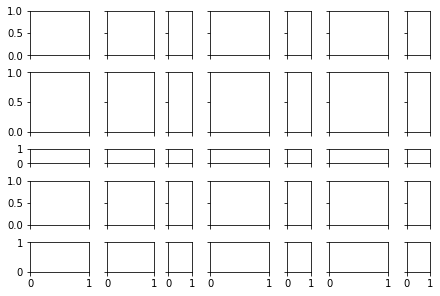

Text(0.5, 0.98, 'Locker Bank Design')

In [ ]:
fig6 = plt.figure(constrained_layout=True)

gs_kw = dict(width_ratios=widths, height_ratios=heights)
fig6, f6_axes = plt.subplots(ncols=column, nrows=rowz, sharex='col', sharey='row', constrained_layout=True,
        gridspec_kw=gs_kw)
for r, row in enumerate(f6_axes):
    for c, ax in enumerate(row):
      plt.show()

fig6.suptitle('Locker Bank Design', fontsize=40)  

# Task 4

# Task 5